<a href="https://colab.research.google.com/github/roboy88/Big-Five-Billionaire-Bible-ModelModel/blob/main/%22Scripture%2C_Psyche%2C_and_Success_Modeling_Financial_Genius_from_Biblical_Traits_and_Psychological_Profiles%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# ✅ Project: Unified Modeling of Biblical Traits, Psychological Profiles, and Financial Success

"""
README: Financial Genius Detection from Biblical Philosophy & Psychometrics

This Colab-ready Python notebook integrates:
- Big Five psychological traits & cognitive aptitudes
- Jordan Peterson's Biblical lecture series
- Real-world billionaire & CEO financial data

🔍 Goals:
- Model the "Ideal Financial Genius" using SMOTE and Random Forest
- Score lectures on personality trait emphasis
- Visualize the most predictive features for success

📦 Required Files (Upload via Colab prompt):
- Data_final.csv
- SCFP2019 2.csv
- CEO_compensation_top50_2020.csv
- CEO_largestrevenue_highestpaid_2020-21.csv
- TOP 50 BILLIONAIRES LIST 2.csv
- 500 richest people 2021.csv
- Biblical_lectures_pt1.txt to Biblical_lectures_pt15.txt

📈 Outputs:
- financial_genius_feature_importance.csv
- lecture_trait_scores.csv
- scored_personality_profiles.csv
"""

# 📦 Step 1: Setup and Install Packages
!pip install -q imblearn




In [31]:
# 📁 Step 2: Import Libraries
from google.colab import files
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

%matplotlib inline



In [32]:
# 📂 Step 3: Upload Files
uploaded = files.upload()
print("Uploaded files:", list(uploaded.keys()))



Saving 500 richest people 2021.csv to 500 richest people 2021 (4).csv
Saving SCFP2019 2.csv to SCFP2019 2 (6).csv
Saving Data_final.csv to Data_final (5).csv
Saving CEO_largestrevenue_highestpaid_2020-21.csv to CEO_largestrevenue_highestpaid_2020-21 (4).csv
Saving Biblical_lectures_pt2.txt to Biblical_lectures_pt2 (4).txt
Saving Biblical_lectures_pt3.txt to Biblical_lectures_pt3 (4).txt
Saving Biblical_lectures_pt8.txt to Biblical_lectures_pt8 (4).txt
Saving Biblical_lectures_pt9.txt to Biblical_lectures_pt9 (4).txt
Saving Biblical_lectures_pt15.txt to Biblical_lectures_pt15 (4).txt
Saving TOP 50 BILLIONAIRES LIST 2.csv to TOP 50 BILLIONAIRES LIST 2 (4).csv
Saving CEO_compensation_top50_2020.csv to CEO_compensation_top50_2020 (4).csv
Saving Biblical_lectures_pt14.txt to Biblical_lectures_pt14 (4).txt
Saving Biblical_lectures_pt4.txt to Biblical_lectures_pt4 (4).txt
Saving Biblical_lectures_pt10.txt to Biblical_lectures_pt10 (4).txt
Saving Biblical_lectures_pt12.txt to Biblical_lectures

In [33]:
# 📊 Step 4: Load and Validate Required Datasets
try:
    psych_df = pd.read_csv("Data_final.csv")
    scf_df = pd.read_csv("SCFP2019 2.csv")
    ceo_df1 = pd.read_csv("CEO_compensation_top50_2020.csv")
    ceo_df2 = pd.read_csv("CEO_largestrevenue_highestpaid_2020-21.csv")
    billionaires_df = pd.read_csv("TOP 50 BILLIONAIRES LIST 2.csv")
    r500_df = pd.read_csv("500 richest people 2021.csv")
except Exception as e:
    print("Error loading data:", e)
    raise



In [34]:
# 📖 Step 5: Load and Process Biblical Lecture Texts
lecture_files = [f"Biblical_lectures_pt{i}.txt" for i in range(1, 16)]
lectures = []
missing = []

for file in lecture_files:
    try:
        with open(file, 'r') as f:
            lectures.append(f.read())
    except FileNotFoundError:
        print(f"❌ Missing: {file}")
        missing.append(file)

if missing:
    raise FileNotFoundError(f"Missing lecture files: {missing}")

lecture_df = pd.DataFrame({'lecture_name': lecture_files, 'text': lectures})



In [35]:
# 🧹 Step 6: Clean Text and Score Traits

def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text).lower()

lecture_df['cleaned_text'] = lecture_df['text'].apply(clean_text)

trait_keywords = {
    'Openness': ["imagine", "explore", "create", "transform"],
    'Conscientiousness': ["discipline", "structure", "responsibility", "order"],
    'Extraversion': ["speak", "lead", "engage", "connect"],
    'Agreeableness': ["help", "care", "serve", "share"],
    'Neuroticism': ["fear", "chaos", "pain", "doubt"]
}

def score_traits(text):
    return {trait: sum(text.count(word) for word in words) for trait, words in trait_keywords.items()}

trait_scores_df = pd.DataFrame([score_traits(t) for t in lecture_df['cleaned_text']])
trait_scores_df['lecture'] = lecture_df['lecture_name']



In [36]:
# 🧠 Step 7: Define Ideal Financial Genius Profile
psych_df['Ideal_Genius'] = psych_df.apply(lambda r: int(
    r['C_score'] > 7 and r['O_score'] > 6 and
    r['Numerical Aptitude'] > 7 and r['Verbal Reasoning'] > 7 and
    r['N_score'] < 5), axis=1)



In [37]:
# 🤖 Step 8: Prepare Features and Target
features = ['O_score', 'C_score', 'E_score', 'A_score', 'N_score',
            'Numerical Aptitude', 'Spatial Aptitude', 'Perceptual Aptitude',
            'Abstract Reasoning', 'Verbal Reasoning']
X = psych_df[features]
y = psych_df['Ideal_Genius']
X_scaled = StandardScaler().fit_transform(X)



In [38]:
# 🧪 Step 9: Balance Data and Train Model
minority_class_count = y.value_counts().min()
k_neighbors = min(5, minority_class_count - 1) if minority_class_count > 1 else 1

X_res, y_res = SMOTE(k_neighbors=k_neighbors).fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))




📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        23

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



<ipython-input-39-61601e7c7369>:10: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


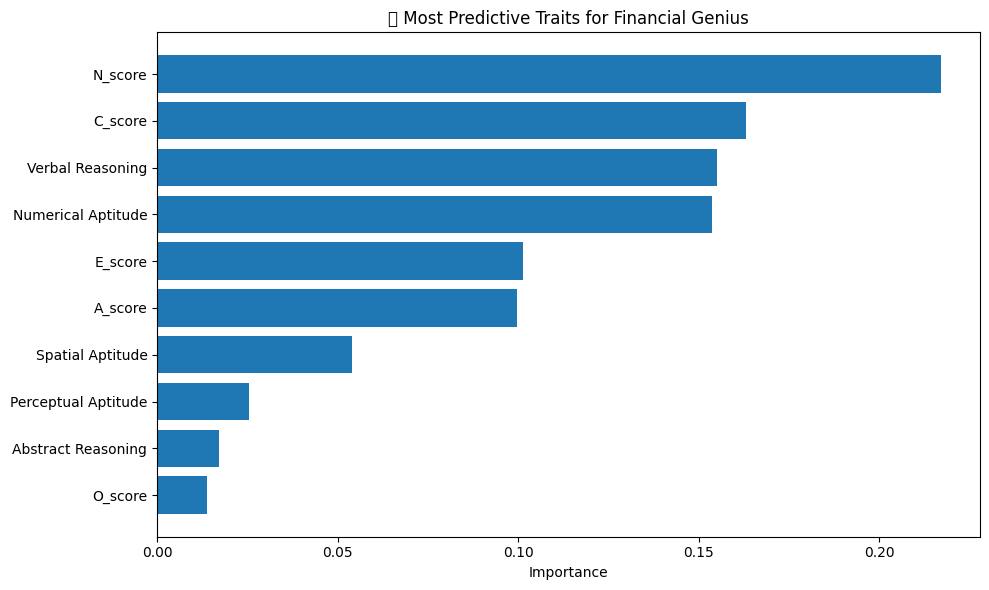

In [39]:
# 📊 Step 10: Visualize Feature Importance
feat_df = pd.DataFrame({"Feature": features, "Importance": model.feature_importances_})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title("🔍 Most Predictive Traits for Financial Genius")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



In [40]:
# 💾 Step 11: Export Results
feat_df.to_csv("financial_genius_feature_importance.csv", index=False)
trait_scores_df.to_csv("lecture_trait_scores.csv", index=False)
psych_df.to_csv("scored_personality_profiles.csv", index=False)

print("\n✅ Exported: Trait importances, lecture scores, and personality profiles.")


✅ Exported: Trait importances, lecture scores, and personality profiles.
